# Capstone Project
Bike Accident in Great Britain from 1979 - 2018

**Analysis By: Jon-Jon Rico-Noll**

*Dataset by: John Harshith* | [Data Link](https://www.kaggle.com/johnharshith/bicycle-accidents-in-great-britain-1979-to-2018?select=Accidents.csv)

This is a Dataset of bicycle accidents in Great Britain that occurred between years for 1979 - 2018.
It explores number of vehicles to number of casualties involved in the accident. As well as gender casualties, severity of the accident and the age group of the victim.

A quick glance of the Datset, first question came to mind was 'Do these accidents occur during more on dry road conditions or wet road conditions?' I feel as most drivers and bikers feel more comfortable on dry road conditions and tends to be more relax. This can hinder their attention to their surroundings and may cause an accident. My hypothesis to my exploration that majority of these accidents occur during dry road conditions. Let's explore!

*Casualty definition: a person injured or killed in a accident*

*Speed Limit: In Great Britain defines speed by MPH*

## Importing Libraries and Data

Let's import the libraries that we will need and our data. We will be importing our data from BigQuery 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

import time
from google.cloud import bigquery

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'capstoneProject3.json'

In [3]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS']

'capstoneProject3.json'

I used *BigQuery* to clean up my data, add columns and change certain things that were in the dataset. The data that have been modified is the *'Time'* column where we changed it from an integer to a string (ex. 08:30 to Morning, 13:45 to Afternoon, etc).
Query below has comments and explanation for each nesting.

In [4]:
query = """Select 
Accident_Index,
      Gender,
      Severity,
      AgeCategory,
      TimeOfDay,
      EXTRACT (YEAR FROM Date) AS Year,
  # For what I need to do with the Data, I don't really need to get the whole date but just year.
  # Using the EXTRACT function to pull the year for the column  
      Number_of_Casualties,
      Number_of_Vehicles,
      Speed_limit,
      Road_conditions,
      Light_conditions
        FROM (
          SELECT
            Accident_Index,
            Gender,
            Severity,
            AgeCategory,
            CASE
              WHEN TimeDay BETWEEN 500 AND 1159 THEN 'Morning'
              WHEN TimeDay BETWEEN 1200 AND 1659 THEN 'Afternoon'
              WHEN TimeDay BETWEEN 1700 AND 2059 THEN 'Evening'
            ELSE
            'Night'
            END
            TimeOfDay,
          # Intead of going through time, I just changed it to Morning, Afternoon, Evening and Night
          # For the purpose of readability and plotting graphs  
            Date,
            Number_of_Casualties,
            Number_of_Vehicles,
            Speed_limit,
            Road_conditions,
            Light_conditions
          FROM (
            SELECT
              Accident_Index,
              Gender,
              Severity,
              AgeCategory,
            # With the use of CONCAT with put Hour and Min together in the same column
            # And with CAST to change the string into an INT
            # This will make it easier for us to do the next nesting  
              CAST (CONCAT(Hour, Min) AS INT64) AS TimeDay,
              Date,
              Number_of_Casualties,
              Number_of_Vehicles,
              Speed_limit,
              Road_conditions,
              Light_conditions
            FROM (
              SELECT
                Accident_Index,
                Gender,
                Severity,
                AgeCategory,
                Time,
              # We are breaking the time to two separate columns between hours and minutes
              # Then above we will connect them together as an INT  
                LEFT(Time, 2) AS Hour,
                RIGHT(Time, 2) AS Min,
                Date,
                Number_of_Casualties,
                Number_of_Vehicles,
                Speed_limit,
                Road_conditions,
                Light_conditions
              FROM (
                SELECT
                  Accident_Index,
                  Gender,
                  Severity,
                # CASE WHEN to put each Age_Grp into an AgeCategory
                # 1 for Children; 2 for Youth; 3 for Adult; 4 for Senior  
                  CASE
                    WHEN Age_Grp = '6 to 10' THEN '1'
                    WHEN Age_Grp = '11 to 15' THEN '1'
                    WHEN Age_Grp = '16 to 20' THEN '2'
                    WHEN Age_Grp = '21 to 25' THEN '2'
                    WHEN Age_Grp = '26 to 35' THEN '3'
                    WHEN Age_Grp = '36 to 45' THEN '3'
                    WHEN Age_Grp = '46 to 55' THEN '3'
                    WHEN Age_Grp = '56 to 65' THEN '3'
                  ELSE
                  '4'
                  END
                  AgeCategory,
                  Time,
                  Date,
                  Number_of_Casualties,
                  Number_of_Vehicles,
                  Speed_limit,
                  Road_conditions,
                  Light_conditions
                FROM (
                  SELECT 
                  # Here, I am compling 
                    gba.Accident_Index,
                  # Also renaming these columns without proper name  
                    string_field_1 AS Gender,
                    string_field_2 AS Severity,
                    string_field_3 AS Age_Grp,
                    Time,
                    Date,
                    Number_of_Casualties,
                    Number_of_Vehicles,
                    Speed_limit,
                    Road_conditions,
                    Light_conditions
                  FROM
                `capstoneproject-334316.CapstoneData.Accidents` gba
                  JOIN
                `capstoneproject-334316.CapstoneData.Bikers` gbb
                  ON
                gba.Accident_Index = gbb.string_field_0)))))"""

client = bigquery.Client()
query_job = client.query(query)

time.sleep(2)
result = query_job.result()

## "Do the accidents occur during dry road conditions or wet road conditions?"

Let's dive into to our data and explore our question!

In [5]:
df = result.to_dataframe()

In [6]:
df.head(10)

,Accident_Index,Gender,Severity,AgeCategory,TimeOfDay,Year,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Road_conditions,Light_conditions
0,197901K2IGW82,Male,Slight,2,Morning,1979,1,2,30.0,Dry,Daylight
1,197901K2IJP51,Male,Slight,2,Morning,1979,1,2,30.0,Dry,Daylight
2,197901K2LDX91,Female,Serious,2,Morning,1979,1,2,30.0,Dry,Daylight
3,197901K2LJC25,Male,Slight,3,Morning,1979,1,2,30.0,Dry,Daylight
4,197901K2MDD78,Male,Slight,2,Afternoon,1979,1,2,30.0,Dry,Daylight
5,197901K2NAX84,Male,Slight,1,Afternoon,1979,1,2,30.0,Dry,Daylight
6,197901K2NHD96,Male,Serious,4,Afternoon,1979,1,2,30.0,Dry,Daylight
7,197901K2PHE55,Male,Slight,1,Afternoon,1979,1,2,30.0,Dry,Daylight
8,197901K2QJU19,Male,Serious,2,Afternoon,1979,1,2,30.0,Dry,Darkness lights lit
9,197901K2RDD34,Male,Slight,2,Evening,1979,1,2,30.0,Dry,Darkness lights lit


Let's create a variable that group with *Road_conditions* with the *Number_of_Casualties* and *Number_of_Vehicles*

In [7]:
RdCond = df.groupby('Road_conditions').sum()
RdCond = RdCond.drop(columns = ['Year', 'Speed_limit'])
RdCond = RdCond.sort_values('Number_of_Casualties', ascending=False)
RdCond                    

,Number_of_Casualties,Number_of_Vehicles
Road_conditions,,
Dry,488017,925440
Wet,141512,271746
Frost,4386,8019
Snow,1305,2484
Missing Data,799,1518
Flood,202,359


Creating a variable of Road_conditions, right off the bat we see that our hypothesis is correct. As it shows, dry road condition has a higher accident compared to other conditions. 
This may be in fact the either drivers or cyclist don't tend to pay attention as the road is clear. I believe everyone else is more cautions with certain conditions aren't in their comfort zone.

Let's create a bar chart to further visualize the difference when the accident occur in dry conditions versus the others. 

[Text(0.5, 1.0, 'Numbers_of_Casualties vs. Road_Conditions')]

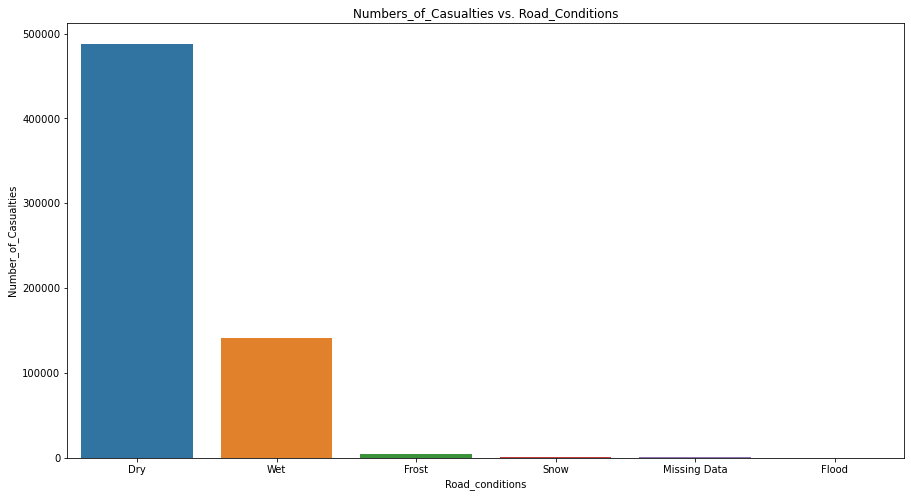

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(x=RdCond.index, y='Number_of_Casualties', data=RdCond).set(title='Numbers_of_Casualties vs. Road_Conditions')

With the dry condition showcasing the a huge difference between the other road conditions, drivers/bikers need to be careful at all times. Any road conditions may it be, drivers and bikers needs to be aware of their surroundings at all times. Situations can occur any conditions or any time of day.

## Investigating casualties further

### Top 10 of Highest Casualties by Year.

Explore the 'Year' - Which year had the most bicycle accident?

In [9]:
NumAccidents = df.groupby(['Year']).sum()
NumAccidents = NumAccidents.drop(columns = ['Speed_limit'])
NumAccidents = NumAccidents.sort_values('Number_of_Casualties', ascending=False)
NumAccidents.head(10)

,Number_of_Casualties,Number_of_Vehicles
Year,,
1984,25927,48505
1983,25329,47314
1989,24337,46415
1982,22820,42261
1985,22179,41698
1988,21654,41216
1990,21497,41145
1987,21305,40421
1986,21240,40268


As the result shows - in seems the 80's was quite a problematic decade for bicycle accidents in Great Britain. More specifically in the mid 80's. This may be because there are no rules implemented towards drivers and cyclist. Or any bicycle lanes and safety procedures, such as wearing helmets and reflective wear. 

### Top 10 Lowest Casualties by Year.

Let's take a look at the lowest Top 10 Casualties by the year. Will it be closer the the same decade as our Highest Top 10 Casualties?

In [10]:
NumAccidents = df.groupby(['Year']).sum()
NumAccidents = NumAccidents.drop(columns = ['Speed_limit'])
NumAccidents = NumAccidents.sort_values('Number_of_Casualties', ascending=True)
NumAccidents.head(10)

,Number_of_Casualties,Number_of_Vehicles
Year,,
2018,2470,4818
2017,2527,4971
2016,5917,11369
2006,9511,18300
2005,9551,18430
2007,9583,18396
2008,9711,18722
2009,10164,19403
2010,10542,20218


It seems with our result, there are less casualties in the late 2010's. Though there was a spike in numbers in 2015. Let's chart a line graph and visualize the time frame of these casualties.

### Number of Casualties by Year

[Text(0.5, 1.0, 'Number_of_Casualties vs. Year')]

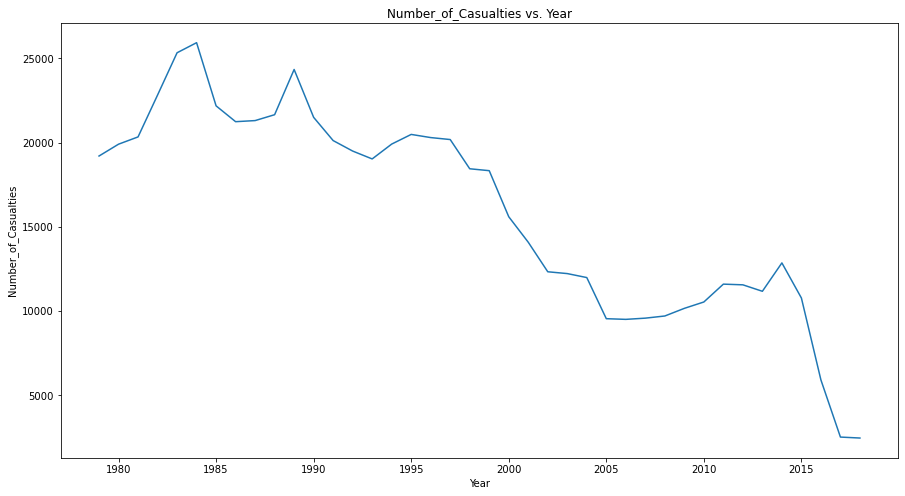

In [11]:
plt.figure(figsize=(15,8))
sns.lineplot(data=NumAccidents, x=NumAccidents.index, y='Number_of_Casualties').set(title='Number_of_Casualties vs. Year')

The Top 10 Highest and Lowest chart have a decade of difference. The chart shows a decline of casualties around 1996-1997 and arise by 2005 with a peak at 2015. Then decline onces again throughout the rest of the year in the dataset. This may have to be a stricter rules of bikers and possibility of bike lanes built.

Let's investigate further with the casualties.

### Top 10 Fatal Accident by Year

In this Dataset - We have column of the *'Severity'* of the accident. From Slightly, Severe, or Fatal.
Since we looked at the Top 10 Highest Casualties by Year - let's see if those years will also reflect with the previous data.

In [12]:
TopFat = df[df['Severity'] == 'Fatal'].groupby('Year').size().to_frame()
TopFat.columns = ['TotalFatality']
TopFat = TopFat.sort_values('TotalFatality', ascending=False)
TopFat.head(10)

,TotalFatality
Year,
1984,246
1983,234
1989,222
1982,221
1985,210
1979,206
1981,206
1987,201
1980,200


With this result, the first 5 is consistent with the first data we looked at. This data suggest 80's was problematic for cyclist. Let's make a line graph and see if there's a decline throughout the year.

[Text(0.5, 1.0, 'TotalFatality vs. Year')]

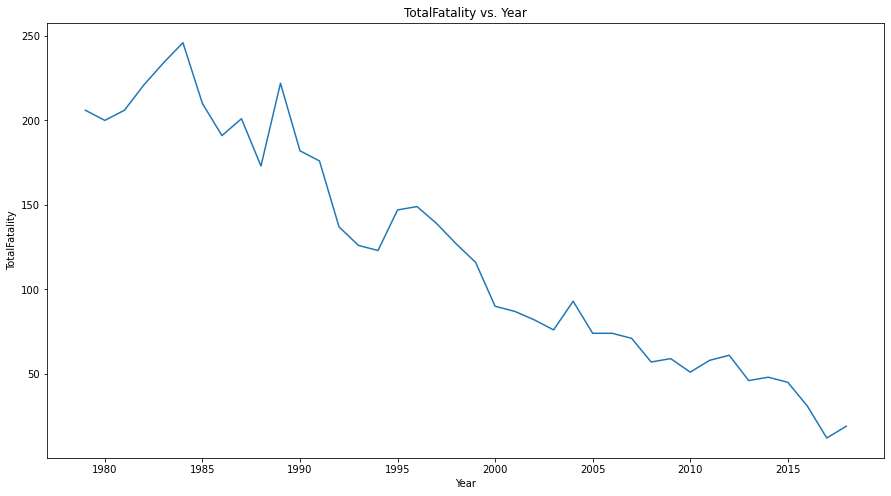

In [13]:
plt.figure(figsize=(15,8))
sns.lineplot(data=TopFat, x=TopFat.index, y='TotalFatality').set(title='TotalFatality vs. Year')

Our line graph shows a decline of 'Fatal' accident with a spike in number in 1989 as showed on our Top 10 Highest Casualties.

Bare in mind, the *Number_of_Casualties* also have all the types of *'Severity'*

At quick glance at our graph, similar to our 'Fatality' graph that we have a spike in number mid and late 80's.
We do see a similar decline from both graphs towards the 2000s. Though with our *Number_of_Casualties* graph, we see an increase from 2005 and 2015 but almost a drastic drop in numbers by 2015. 

I believe that they enforced and have stricter rules when it comes to cyclist. Such as wearing helmets and reflective wear when riding in the evening.

### Accidents by TimeOfDay

Let's see how we can when these accident usually occur. Do they happen in the morning or afternoon or in the evening. 

Also while looking at the *mean* of the *Speed_limt*

**Time Of Day Breakdown**

*Military Time*

Morning = 05:00 - 11:59

Afternoon = 12:00 - 16:59

Evening = 17:00 - 20:59

Night = 21:00 - 04:59

In [14]:
TOD1 = df.groupby(['TimeOfDay']).sum()
TOD1 = TOD1.drop(columns=['Year', 'Speed_limit'])
TOD1 = TOD1.sort_values('Number_of_Casualties', ascending=False)

TOD2 = df.groupby('TimeOfDay').mean('Speed_limit')
TOD2 = TOD2.drop(columns=['Year', 'Number_of_Casualties', 'Number_of_Vehicles'])
TOD2.columns = ['SpeedLimitMean']

TOD = pd.merge(TOD1, TOD2, how="inner", on="TimeOfDay")
TOD

,Number_of_Casualties,Number_of_Vehicles,SpeedLimitMean
TimeOfDay,,,
Afternoon,210390,399233,33.142901
Evening,192167,365733,33.038518
Morning,191293,366060,33.283697
Night,42371,78540,33.042424


It seems that the average *'Speed_Limit'* where the accidents occur to be within 33mph. Either Drivers are not paying attention to Road Speed Limit or thinking they're going slow enough that they won't have to full pay attention around them.

<AxesSubplot:xlabel='TimeOfDay', ylabel='Number_of_Casualties'>

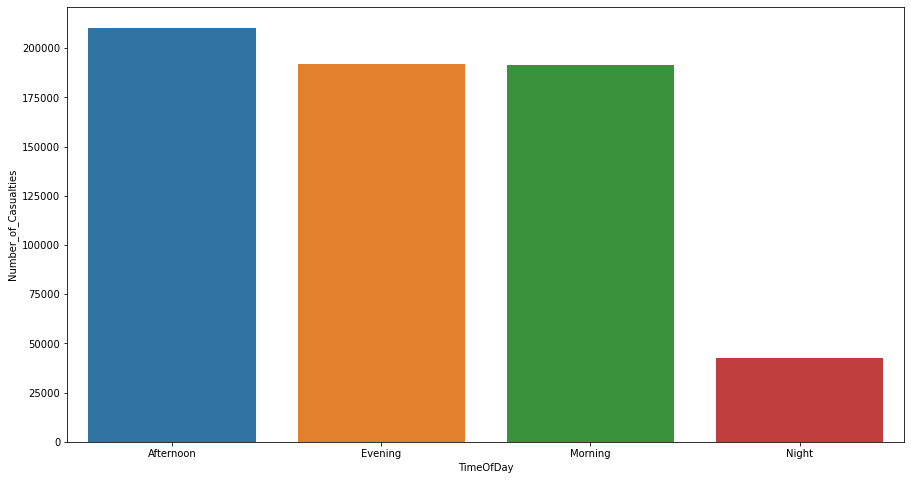

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x=TOD.index, y='Number_of_Casualties', data=TOD)

As the graph shows throughout the year, majority of these accidents occur in the afternoon. It maybe as there are a lot more vehicles around the area for lunch and people rushing to be home. Since the morning is fairly close as well during Evening, fair to say people either going to school or to work. Everyone in rush mode and not paying attention to their surroundings.

## In conclusion

More accident occur during dry road conditions. I believe, cyclist and/or drivers feels more relax to clear conditions compare to let's say rainy/wet conditions. But with what the graph showcase from our *NumAccidents* variable - there has been a decrease over the years of accidents. This may in cause of adding more bicycle lanes on heavy traffic areas. Government stepping in and making sure the cyclist follow *THE* rules. Rules such as putting on a helmet or reflective wear. As the data shows that this measures helped the decrease of bicycle accidents in Great Britain. 

Click [here](https://www.gov.uk/guidance/the-highway-code/rules-for-cyclists-59-to-82) to check out the Rules for Cyclist in the UK. 

For more visualization of this data, click on my [Tableau](https://public.tableau.com/app/profile/jon.jon.rico.noll/viz/capstoneProject_16390231004630/BicycleAccident)